# Exploring Weather Trends Project
Author: Daniel Cummings   
Email: daniel.j.cummings@me.com   
Date: 4/13/2018   

**Problem Statement:**    
In this project, global temperature data over time is analyzed and compared against the local temperature trends in Austin, TX (where I currently live);  London, UK; and New York City, NY.

**Source Data:**   
Weather data is provided by Udacity as part of the Data Analysis Nanodegree Program. http://www.udacity.com

**Tools/Packages used:**    
SQL, Python, Numpy, Matplotlib, Scipy, Jupyter Notebook

### Extracting The Temperature Data

Global and local temperature data was extracted from a SQL database provided by [Udacity](http://www.udacity.com). By default, I chose data for my current city (Austin, TX) and added data from London and New York City to lend additional insights into the weather trends. Since temperature data is being evaluated over time, I insured that the temperatures were sorted in ascending order by year. The results were exported as *global_results.csv*, *austin_tx_results.csv*, *london_uk_results.csv*, and *newyork_ny_results.csv*. The SQL database input commands used to extract data are listed below. 

**SQL Input for Global Data:**   
SELECT year, avg_temp   
FROM global_data   
ORDER BY year   

**SQL Input for City Data:**   
SELECT year, avg_temp   
FROM city_data   
WHERE country IN('United States') AND city IN('Austin')   
ORDER BY year   

SELECT year, avg_temp   
FROM city_data
WHERE country IN('United Kingdom') AND city IN('London')   
ORDER BY year   

SELECT year, avg_temp   
FROM city_data   
WHERE country IN('United States') AND city IN('New York')   
ORDER BY year   

### Importing the Data

The temperature data was imported using the [numpy.loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function. Some of the temperature data was missing for early years, so 'skiprows' was used to slice the data for some cities. Note that [numpy.genfromtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html) could have been used to handle the missing data, but is was simpler to use continous year-by-year temperature data for some of the following functions. The imported data was stored as a two column numpy array where the first column was 'year' and the second column was 'temperature.' After importing the data, the range of years for which temperature data was available for all cities was calculated and stored in the *year_min* and *year_max* variables. 

In [1]:
import numpy as np

# Import csv data using the loadtxt function, skipping segments of missing temperature data
austin_data = np.loadtxt("austin_tx_results.csv", delimiter=",", skiprows=4)
global_data = np.loadtxt("global_results.csv", delimiter=",", skiprows=1)
london_data = np.loadtxt("london_uk_results.csv", delimiter=",", skiprows=9)
newyork_data = np.loadtxt("newyork_ny_results.csv", delimiter=",", skiprows=40)

# Determine 'year' range common to all imported data, used for x-axis in later plots
year_min = max(min(austin_data[:,0]),min(global_data[:,0]), \
               min(london_data[:,0]),min(newyork_data[:,0]))
year_max = min(max(austin_data[:,0]),max(global_data[:,0]), \
               max(london_data[:,0]),max(newyork_data[:,0]))
print('Temperature data for all locations is available in year range: {:.0f} - {:.0f}' \
      .format(year_min,year_max))

Temperature data for all locations is available in year range: 1823 - 2013


### Moving Average Function
As later data will show, the year-to-year variations in temperature data add substantial 'noise' to the line plots. I created a moving average function that expects a temperature vector and an averaging window. The 'window' defines how many years should be averaged together. I added *None* placeholders to keep the output vector size compatible with the associated year/temp array and created test vector to verify the function.  

In [2]:
# Moving Average Function with temperature vector and window inputs
def moving_avg(vector, window):
    win = int(window)
    output = [None]*(win-1)
    vector.tolist()
    for i in range(0, len(vector)-win+1): 
        output.append(sum(vector[i:i+win])/win)
    assert len(output) == len(vector), \
            "moving_avg input and output vectors are not the same length!"
    return np.array(output)

test_vector = np.array([1,2,3,4,5,6,7,8,9,10])
print(moving_avg(test_vector, 3))

[None None 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0]


### Plotting the Temperature Trends

With the temperature data imported and the moving average function defined, the trends were ready to be plotted. The *plot_compare* function was created to limit the amount of redundant code. To plot the temperature trends, the [matplotlib](https://matplotlib.org/) library was used. The first plot shows the smoothing effect of the 'moving average' function using the Austin Texas city data. The next plot compares the global trend versus local temperature trends over time. Finally, for a more direct comparison, the global data and Austin data are shown side-by-side to observe the correlation of temperature trends. Note that due to the 'noise' in the Austin data, a twenty year moving average was used to smooth out the curve. This twenty year average seems high and screens out some interesting local variations, but the comparison is interesting nonetheless and shows an increasing temperature trend overall.  

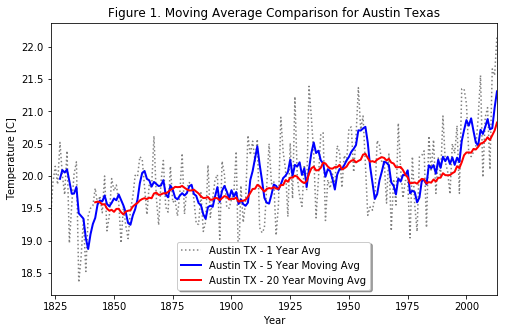

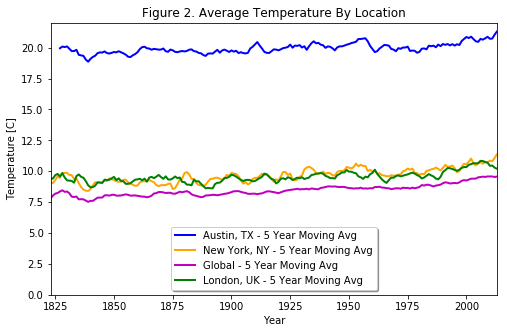

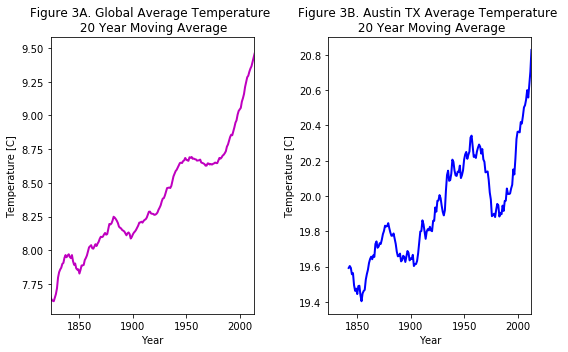

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]

def plot_compare(array_data,location,window=5,color='blue',color2='blue',plot_all=True):
    # Option to plot the annual 1-year average
    if plot_all:
        plt.plot(array_data[:,0], array_data[:,1], ':', \
                 label=f'{location} - 1 Year Avg',color=color2)
    # Transform data into moving average
    array_data_avg = moving_avg(array_data[:,1],window)
    plt.plot(array_data[:,0], array_data_avg, '-', \
             label=f'{location} - {window} Year Moving Avg',color=color, linewidth=2)
    plt.xlabel('Year')
    plt.ylabel('Temperature [C]')
    plt.xlim(year_min,year_max)
    return None

# Plot Austin TX 1 and 5 year average temperature trends
plot_compare(austin_data, location='Austin TX', window=5, color2='gray')
plot_compare(austin_data, location='Austin TX', window=20, color='red', plot_all=False)
plt.title('Figure 1. Moving Average Comparison for Austin Texas')
plt.legend(loc='lower center', shadow=True)
plt.show()

# Plot global and local city temperature trends
plot_compare(austin_data, location='Austin, TX', color='blue', plot_all=False)
plot_compare(newyork_data, location='New York, NY', color='orange', plot_all=False)
plot_compare(global_data, location='Global', color='m', plot_all=False)
plot_compare(london_data, location='London, UK', color='green', plot_all=False)
plt.title('Figure 2. Average Temperature By Location')
plt.legend(loc='lower center', shadow=True)
plt.ylim(0,22)
plt.show()

# Plot global and Austin temperature trends, smoothed out with 20 year average
plt.subplot(121)
plot_compare(global_data, location='Global', window=20, color='m', plot_all=False)
plt.title('Figure 3A. Global Average Temperature \n 20 Year Moving Average')
plt.subplot(122)
plot_compare(austin_data, location='Austin', window=20, color='blue', plot_all=False)
plt.title('Figure 3B. Austin TX Average Temperature \n 20 Year Moving Average')
plt.tight_layout()
plt.show()

### Correlation Coefficient

In the plots above, there was an interesting similarity in temperature trends between global data and local data. As suggested in the project rubric, the correlation coefficient provides a useful metric for comparing temperature trends. The Pearson correlation coefficient [pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) is readily available using the Scipy package and measures the linear relationship between two datasets. The coefficient varies between -1 and +1 with 0 implying no correlation. A positive correlation (+1) implies that as global temperature increases, local temperature *increases*. A negative correlation (-1) implies that as global temperature increases, local temperature *decreases*.

For creating the correlation figure, I copied and modified the matplotlib [barchart](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) demo.

In [13]:
from scipy import stats

# The np.where method was used to determine the array range for 1823-2013 for each city
# There is a probably a more elegant method of doing this...
#print(np.where(london_data == year_min))
#print(np.where(london_data == year_max))
austin_tempscl = austin_data[:,1]
global_tempscl = global_data[73:264,1]
newyork_tempscl = newyork_data[41:232,1]
london_tempscl = london_data[72:263,1]

# Annual correlation coefficient, outputs (r,p) tuple, using only 'r' hence the [0] at the end
austin_r = stats.pearsonr(global_tempscl,austin_tempscl)[0]
london_r = stats.pearsonr(global_tempscl,london_tempscl)[0]
newyork_r = stats.pearsonr(global_tempscl,newyork_tempscl)[0]

# 5-year moving average correlation coefficient
austin_r_5avg = stats.pearsonr(moving_avg(global_tempscl,5)[4:],moving_avg(austin_tempscl,5)[4:])[0]
london_r_5avg = stats.pearsonr(moving_avg(global_tempscl,5)[4:],moving_avg(london_tempscl,5)[4:])[0]
newyork_r_5avg = stats.pearsonr(moving_avg(global_tempscl,5)[4:],moving_avg(newyork_tempscl,5)[4:])[0]

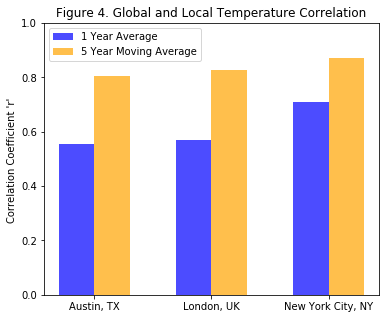

In [16]:
# Plot the correlation of temperature data
annual_average = (austin_r, london_r , newyork_r)
moving_average = (austin_r_5avg, london_r_5avg , newyork_r_5avg)

fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.7
n_groups = 3
index = np.arange(n_groups)

rects1 = plt.bar(index, annual_average, bar_width,
                 alpha=opacity,
                 color='b',
                 label='1 Year Average')

rects2 = plt.bar(index + bar_width, moving_average, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='5 Year Moving Average')

plt.ylabel("Correlation Coefficient 'r' ")
plt.title('Figure 4. Global and Local Temperature Correlation')
plt.xticks(index + bar_width / 2, ('Austin, TX', 'London, UK', 'New York City, NY'))
plt.legend()
plt.ylim(0,1)
plt.rcParams['figure.figsize'] = [6, 5]

plt.show()

### Predicting Temperature

To predict the temperature of Austin Texas and other cities based on past global temperatures, I calculated a set of ratios from the temperature trend data. The *avg_temp_ratio* function calculates the global/local ratio for each year and then finds the average for all years. For example, the annual average temperature in Austin can be predicted by multiplying the global average by *2.362x* for a specific year. To test the ratio, the predicted and actual average temperatures for Austin are given below for the arbitrary years 1880 and 2013. 

In [17]:
def avg_temp_ratio(myglobal, mylocal, name='Local', info=False):
    ratio = np.divide(mylocal, myglobal)   #element-wise array division
    ratio_avg = np.average(ratio)
    sd = np.std(ratio)
    if info:
        print("Ratio of {}/Global temperatures = {:.3f} (SD = {:.3f})"\
         .format(name, ratio_avg, sd))
    return ratio_avg, sd

austin_ratio = avg_temp_ratio(global_tempscl, austin_tempscl, 'Austin', True)
avg_temp_ratio(global_tempscl, london_tempscl, 'London', True)
avg_temp_ratio(global_tempscl, newyork_tempscl, 'New York', True)

print("\nAustin TX Prediction vs. Actual in 1880:")
print("Prediction: {:.2f} C \nActual: {:.2f} C".format(global_data[130,1]*(austin_ratio[0]),austin_data[57,1]))

print("\nAustin TX Prediction vs. Actual in 2013:")
print("Prediction: {:.2f} C \nActual: {:.2f} C".format(global_data[-3,1]*(austin_ratio[0]),austin_data[-1,1]))

Ratio of Austin/Global temperatures = 2.362 (SD = 0.113)
Ratio of London/Global temperatures = 1.128 (SD = 0.068)
Ratio of New York/Global temperatures = 1.144 (SD = 0.067)

Austin TX Prediction vs. Actual in 1880:
Prediction: 19.18 C 
Actual: 19.41 C

Austin TX Prediction vs. Actual in 2013:
Prediction: 22.70 C 
Actual: 22.18 C


### Observations

1. The moving average function softens the data line plot and shows an overall trend of increasing temperature as time progresses (Fig 1). Interestingly, when viewing the Austin TX data on a yearly basis (no averaging), one could imply that if a hotter than average year occurs, a colder than average year(s) will occur within the next 1-3 years and vice versa. 
2. Austin Texas is much hotter compared to the global, New York and London locations...grab me some lemonade! This makes sense given the geographic locations of the cities in this study and the fact that the global temperature are 'globally' averaged (Fig 2). 
3. Both global and local data shows a consistent trend of increasing temperature over the past ~200 hundred years (Fig 3A, 3B). Furthermore, there is a correlation in the local peaks and valleys of the trends with the Austin data looking a bit more exaggerated. 
4. The correlation coefficient between global and local temperatures is positive (>0.55), meaning that as global temperatures increase, local temperatures should increase as well (Fig 4). As the moving average method was applied, the correlation increased to >0.8. The increase in correlation was due to the local data 'smoothing' which better matches the global data (already smoothed out due to global averaging). Interestingly, New York City had the closest correlation to global temperatures.
5. Due to the high correlation of temperature trends, simple ratios could be calculated to predict the temperature of cities based on the global temperature for a given year with reasonable accuracy. 